# Miniproject - Neuroscience: cellular and circuit mechanisms (BIO-482)

- This notebook produces the figures for **part 4** of the miniproject.

#### Importing libraries

In [22]:
# Standard libraries
import os
import sys
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import randint
from pathlib import Path


# Visualization
#%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn: preprocessing and model selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin, clone

# Scikit-learn: classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Scikit-learn: metrics
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    confusion_matrix,
    classification_report
)

#### Importing helper functions
 Feel free to check out what these functions do in the corresponding files, `helpers.py` or `utils.py`. 
 - `helpers.py` contains functions to analyze membrane potential recording data
 - `utils.py` contains functions useful for other things e.g. plotting

In [23]:
base_path = os.getcwd()
base_path = base_path.replace('notebooks', 'scripts') # note: if you have notebooks twice in your base_path, this won't work
sys.path.insert(1, base_path)


from helpers import *
from utils import remove_top_right_frame, jitter_scatterplot
path_image = Path(r"C:\Users\Gauthier Huguelet\OneDrive - epfl.ch\EPFL\MA1\cell and circuit mech of brain fct\miniproject\BIO482_MiniProject_2025_Python\Figures\question4")
# Test

# Load data
Load the data as `.pkl` file (saved from previous part):

In [24]:
# Make paths
main_dir = r"C:\Users\Gauthier Huguelet\OneDrive - epfl.ch\EPFL\MA1\Cell and circuit mech of brain fct\miniproject\BIO482_MiniProject_2025_Python" # EDIT the path !!!!!!!
print('Main working directory:', main_dir)
figure_path = os.path.join(main_dir, 'Figures')
os.makedirs(figure_path, exist_ok=True)
data_path = os.path.join(main_dir, 'Data') 
results_path = os.path.join(main_dir, 'Results')
fname = 'data_bio482.pkl'
data_df = pd.read_pickle(os.path.join(data_path, fname))

Main working directory: C:\Users\Gauthier Huguelet\OneDrive - epfl.ch\EPFL\MA1\Cell and circuit mech of brain fct\miniproject\BIO482_MiniProject_2025_Python


In [25]:
data_df.head()

,Cell_APThreshold_Slope,Cell_Anatomy,Cell_Counter,Cell_Depth,Cell_ID,Cell_Layer,Cell_TargetedBrainArea,Cell_Type,Cell_tdTomatoExpressing,Mouse_DateOfBirth,...,Sweep_Counter,Sweep_MembranePotential,Sweep_MembranePotential_SamplingRate,Sweep_PassiveContactTimes,Sweep_QuietTimes,Sweep_StartTime,Sweep_Type,Sweep_WhiskerAngle,Sweep_WhiskerAngle_SamplingRate,Sweep_WhiskingTimes
0,10.0,L2/3;C2,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,1.0,"[-0.044009375, -0.044028125, -0.0439875, -0.04...",20000.0,"[[4.567, 4.713], [7.327, 7.519], [14.481, 14.6...","[[0.002, 4.564], [4.606, 6.09], [14.634, 15.52...",2005.0,active touch,"[2.740000000000009, 2.740000000000009, 2.74000...",100.0,"[[6.118, 6.326], [7.942, 13.856]]"
1,10.0,L2/3;C2,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,2.0,"[-0.046275, -0.04629375, -0.046259375, -0.0462...",20000.0,"[[15.274999999999999, 15.375], [16.247, 16.643...","[[0.002, 4.496], [5.558, 6.626], [13.406, 15.2...",2005.0,active touch,"[2.680000000000007, 2.680000000000007, 2.68000...",100.0,"[[4.7, 5.196], [6.696, 11.15], [12.032, 13.006..."
2,10.0,L2/3;C2,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,3.0,"[-0.041896875, -0.0419125, -0.041909375, -0.04...",20000.0,"[[4.347000000000001, 7.0390000000000015], [8.2...","[[0.002, 2.128], [6.252, 7.01], [7.15, 20.0]]",2005.0,passive contact,"[1.4958937492820894, 1.5019819900587095, 1.509...",100.0,"[[2.15, 3.652], [4.362, 5.848]]"
3,10.0,L2/3;C2,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,4.0,"[-0.04655625, -0.0465875, -0.046575, -0.046596...",20000.0,nan,"[[0.002, 2.764], [12.03, 14.464], [14.814, 15....",2005.0,active touch,"[2.467493802679826, 2.459711310964792, 2.46562...",100.0,"[[2.766, 12.026], [15.626, 18.406], [18.814, 1..."
4,10.0,L2/3;C2,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,5.0,"[-0.047296875, -0.047284375, -0.047265625, -0....",20000.0,"[[4.411000000000001, 4.4809999999999945], [5.2...","[[0.002, 3.36], [3.57, 4.424], [4.48, 5.224], ...",2005.0,active touch,"[2.4399999999999977, 2.4399999999999977, 2.440...",100.0,"[[5.228, 5.624], [7.462, 8.022], [11.002, 15.2..."


In [26]:

cell_list = sorted(np.unique(data_df.Cell_ID), reverse=True)
print(np.size(cell_list))

240


In [27]:
r_p1name = 'Part1_Results.csv'
results_p1 = pd.read_csv(os.path.join(results_path,r_p1name),sep=';',index_col=0)
r_p2name = 'Part2_Results.csv'
results_p2 = pd.read_csv(os.path.join(results_path,r_p2name),sep=';',index_col=0)
r_p3name = 'Part3_Results.csv'
results_p3 = pd.read_csv(os.path.join(results_path,r_p3name),sep=';',index_col=0)

In [28]:
results_final = results_p1.merge(results_p2[['cell_id', 'delta_vm','delta_ap']], on='cell_id', how='right')


# Preprocessing

In [29]:
#remove Nana values
results_final.dropna(axis=0,inplace=True)
#create features matrix and label matrix
feature_matrix = results_final.drop(columns=['cell_type','cell_id'])
label_matrix = results_final['cell_type']
# create train/test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_matrix,label_matrix,test_size = 0.3,stratify = label_matrix, random_state=42
    )
# standardize based on training data only
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
#create the models : 
Lr = LogisticRegression(
    random_state=42
)
Rfc = RandomForestClassifier(
    random_state =42
    )
Gbc = GradientBoostingClassifier(
    random_state= 42
)


#Fit the models :
Lr.fit(X_train,y_train)
Rfc.fit(X_train,y_train)
Gbc.fit(X_train,y_train)

#print out scores :
print("LogisticRegression score : ",Lr.score(X_test,y_test))
print("RandomForestClassifier score : ",Rfc.score(X_test,y_test))
print("GradientBoostingClassifier score : ",Gbc.score(X_test,y_test))


LogisticRegression score :  0.8382352941176471
RandomForestClassifier score :  0.8382352941176471
GradientBoostingClassifier score :  0.8823529411764706


### Initial Model Comparison - Results Interpretation

The initial comparison of three classifiers on the 4-class neuron classification task (EXC, PV, SST, VIP) reveals:

| Model | Accuracy |
|-------|----------|
| Logistic Regression | 83.8% |
| Random Forest | 83.8% |
| **Gradient Boosting** | **88.2%** |

**Key Observations:**
- **Gradient Boosting Classifier** outperforms the other models by ~4.5 percentage points
- Both Logistic Regression and Random Forest achieve identical accuracy, suggesting the decision boundaries for this problem may be relatively well-defined
- The strong baseline performance (~84%) indicates that the electrophysiological features extracted in Parts 1-3 carry meaningful information for distinguishing neuron types

**Why Gradient Boosting performs better:**
Gradient Boosting builds trees sequentially, with each tree correcting the errors of the previous ensemble. This is particularly effective when:
1. There are complex, non-linear relationships between features and classes
2. Some classes are harder to distinguish than others (as we'll see with VIP neurons)


# Evaluation Metrics
- Overall accuracy
- Per-class precision, recall, F1
- Confusion Matrix
- Balanced accuracy
- CV 5-fold

In [31]:
def plot_model_comparison(model_evals, model_names, metrics=['accuracy', 'balanced_accuracy'], 
                          title="Model Comparison", figsize=(10, 6)):
    """
    Plot evaluation metrics as a grouped barplot to compare models.
    
    Parameters:
    -----------
    model_evals : list of dicts
        List of evaluation dictionaries returned by evaluate_model()
    model_names : list of str
        Names of the models for the x-axis
    metrics : list of str
        Which metrics to plot. Options: 'accuracy', 'balanced_accuracy', 
        or class names like 'EXC', 'PV', 'SST', 'VIP' for per-class F1 scores
    title : str
        Title for the plot
    figsize : tuple
        Figure size
    """
    
    # Collect data
    data = {metric: [] for metric in metrics}
    
    for eval_dict in model_evals:
        for metric in metrics:
            if metric in ['accuracy', 'balanced_accuracy']:
                data[metric].append(eval_dict[metric])
            else:
                # Assume it's a class name, get F1 score from report
                if metric in eval_dict['report'].index:
                    data[metric].append(eval_dict['report'].loc[metric, 'f1-score'])
                else:
                    data[metric].append(0)
    
    # Create plot
    x = np.arange(len(model_names))
    width = 0.8 / len(metrics)
    
    fig, ax = plt.subplots(figsize=figsize)
    
    colors = plt.cm.Set2(np.linspace(0, 1, len(metrics)))
    
    for i, (metric, values) in enumerate(data.items()):
        offset = (i - len(metrics)/2 + 0.5) * width
        bars = ax.bar(x + offset, values, width, label=metric.replace('_', ' ').title(), color=colors[i])
        # Add value labels on bars
        for bar, val in zip(bars, values):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                   f'{val:.2f}', ha='center', va='bottom', fontsize=9)
    
    ax.set_ylabel('Score')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=15, ha='right')
    ax.legend(loc='lower right')
    ax.set_ylim(0, 1.15)
    ax.axhline(y=1.0, color='gray', linestyle='--', alpha=0.3)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    return fig


def plot_perclass_comparison(model_evals, model_names, classes, metric='f1-score',
                             title="Per-Class Performance Comparison", figsize=(12, 6)):
    """
    Plot per-class metrics (precision, recall, or F1) as grouped barplot.
    
    Parameters:
    -----------
    model_evals : list of dicts
        List of evaluation dictionaries returned by evaluate_model()
    model_names : list of str
        Names of the models
    classes : list of str
        Class names to plot (e.g., ['EXC', 'PV', 'SST', 'VIP'])
    metric : str
        Which metric to plot: 'precision', 'recall', or 'f1-score'
    """
    
    # Collect data: for each class, get the metric for each model
    data = {cls: [] for cls in classes}
    
    for eval_dict in model_evals:
        for cls in classes:
            if cls in eval_dict['report'].index:
                data[cls].append(eval_dict['report'].loc[cls, metric])
            else:
                data[cls].append(0)
    
    # Create plot
    x = np.arange(len(model_names))
    width = 0.8 / len(classes)
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Use distinct colors for each class
    colors = {'EXC': '#2ecc71', 'PV': '#e74c3c', 'SST': '#3498db', 'VIP': '#9b59b6', 'INT': '#e67e22'}
    
    for i, (cls, values) in enumerate(data.items()):
        offset = (i - len(classes)/2 + 0.5) * width
        color = colors.get(cls, plt.cm.Set1(i/len(classes)))
        bars = ax.bar(x + offset, values, width, label=cls, color=color)
        # Add value labels
        for bar, val in zip(bars, values):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                   f'{val:.2f}', ha='center', va='bottom', fontsize=8, rotation=45)
    
    ax.set_ylabel(metric.replace('-', ' ').title())
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=15, ha='right')
    ax.legend(title='Cell Type', loc='lower right')
    ax.set_ylim(0, 1.2)
    ax.axhline(y=1.0, color='gray', linestyle='--', alpha=0.3)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    return fig
def plot_confusion_matrix(cm, classes, model_title,save_fig=True):
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix - " + model_title)
    plt.tight_layout()
    if save_fig:
        fname = os.path.join(path_image, f'confusion_matrix_{model_title.replace(" ","_")}.png')
        plt.savefig(fname=fname, dpi='figure', format='png', bbox_inches='tight')
    plt.show()
    
def evaluate_model(y_test, y_pred, classes, model_title="Model"):
    """
    Evaluate a classifier and print accuracy, balanced accuracy,
    classification report (as markdown), and plot the confusion matrix.
    """
    
    print("*"*50 + f"\n{model_title} :\n" + "*"*50)
    
    # ---- Metrics ----
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    print(f" - accuracy: {acc}")
    print(f" - balanced accuracy: {bal_acc}")
    
    # ---- Classification report ----
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    
    print("\n - classification report:\n", report_df.to_markdown(floatfmt=".3f"))
    
    # ---- Confusion Matrix ----
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes, model_title)
    
    #print("\n - confusion matrix:\n", cm)
    
    return {
        "accuracy": acc,
        "balanced_accuracy": bal_acc,
        "report": report_df,
        "confusion_matrix": cm
    }

**************************************************
Logistic Regression :
**************************************************
 - accuracy: 0.8382352941176471
 - balanced accuracy: 0.7429761904761905

 - classification report:
 |              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| EXC          |       0.923 |    0.960 |      0.941 |    25.000 |
| PV           |       0.857 |    0.857 |      0.857 |    14.000 |
| SST          |       0.760 |    0.905 |      0.826 |    21.000 |
| VIP          |       0.667 |    0.250 |      0.364 |     8.000 |
| accuracy     |       0.838 |    0.838 |      0.838 |     0.838 |
| macro avg    |       0.802 |    0.743 |      0.747 |    68.000 |
| weighted avg |       0.829 |    0.838 |      0.820 |    68.000 |


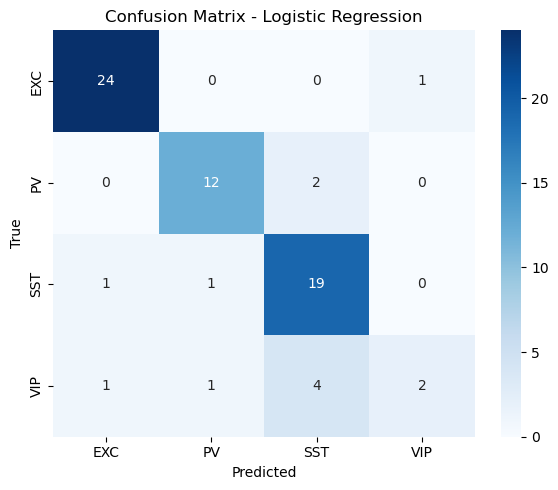

**************************************************
Random Forest Classifier :
**************************************************
 - accuracy: 0.8382352941176471
 - balanced accuracy: 0.7623214285714286

 - classification report:
 |              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| EXC          |       0.960 |    0.960 |      0.960 |    25.000 |
| PV           |       0.800 |    0.857 |      0.828 |    14.000 |
| SST          |       0.720 |    0.857 |      0.783 |    21.000 |
| VIP          |       1.000 |    0.375 |      0.545 |     8.000 |
| accuracy     |       0.838 |    0.838 |      0.838 |     0.838 |
| macro avg    |       0.870 |    0.762 |      0.779 |    68.000 |
| weighted avg |       0.858 |    0.838 |      0.829 |    68.000 |


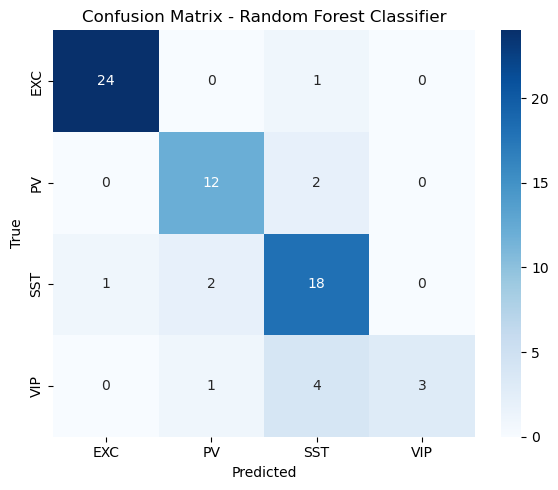

**************************************************
Gradient Boosting Classifier :
**************************************************
 - accuracy: 0.8823529411764706
 - balanced accuracy: 0.8422619047619048

 - classification report:
 |              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| EXC          |       0.962 |    1.000 |      0.980 |    25.000 |
| PV           |       0.833 |    0.714 |      0.769 |    14.000 |
| SST          |       0.792 |    0.905 |      0.844 |    21.000 |
| VIP          |       1.000 |    0.750 |      0.857 |     8.000 |
| accuracy     |       0.882 |    0.882 |      0.882 |     0.882 |
| macro avg    |       0.897 |    0.842 |      0.863 |    68.000 |
| weighted avg |       0.887 |    0.882 |      0.880 |    68.000 |


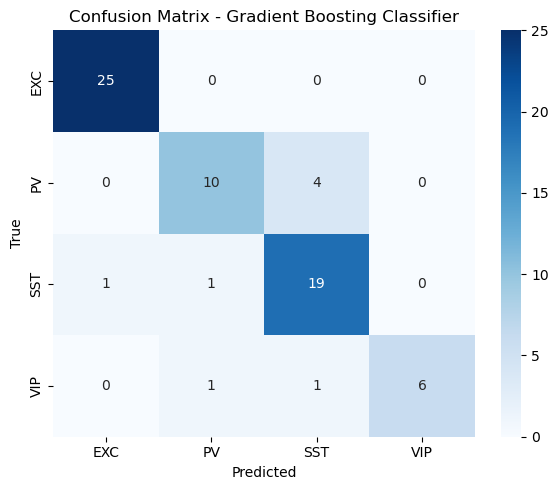

In [32]:
#more in depth metrics : 
classes = ["EXC", "PV", "SST", "VIP"]
# Predictions
y_pred_lr = Lr.predict(X_test)
y_pred_rfc = Rfc.predict(X_test)
y_pred_gbc = Gbc.predict(X_test)

model_eval_lr = evaluate_model(y_test, y_pred_lr, classes, "Logistic Regression")
model_eval_rfc = evaluate_model(y_test, y_pred_rfc, classes, "Random Forest Classifier")
model_eval_gbc = evaluate_model(y_test, y_pred_gbc, classes, "Gradient Boosting Classifier")

### Detailed Evaluation - Results Interpretation

**Performance Breakdown by Cell Type:**

| Cell Type | Best Recall | Hardest to Classify |
|-----------|-------------|---------------------|
| **EXC** | 96% (all models) | ✓ Easiest |
| **PV** | 85-86% | Moderate |
| **SST** | 76-90% | Moderate |
| **VIP** | 25-38% | ✗ Most difficult |

**Critical Insight - The VIP Problem:**
- VIP neurons are severely misclassified across all models (recall as low as 25%)
- This is primarily due to **class imbalance**: only 8 VIP samples in the test set vs. 25 EXC samples
- VIP neurons are often confused with SST neurons, suggesting overlapping electrophysiological signatures

**Balanced Accuracy vs. Standard Accuracy:**
- Standard accuracy is inflated by good EXC performance (largest class)
- Balanced accuracy (which weights all classes equally) reveals the true struggle: ~74-76%
- This gap of ~6-8% highlights the importance of looking beyond simple accuracy metrics

**Confusion Matrix Patterns:**
- EXC neurons are rarely misclassified (only 0-1 errors)
- Most errors occur in the INH→INH direction (e.g., VIP→SST, SST→PV)
- This suggests interneuron subtypes share similar intrinsic properties


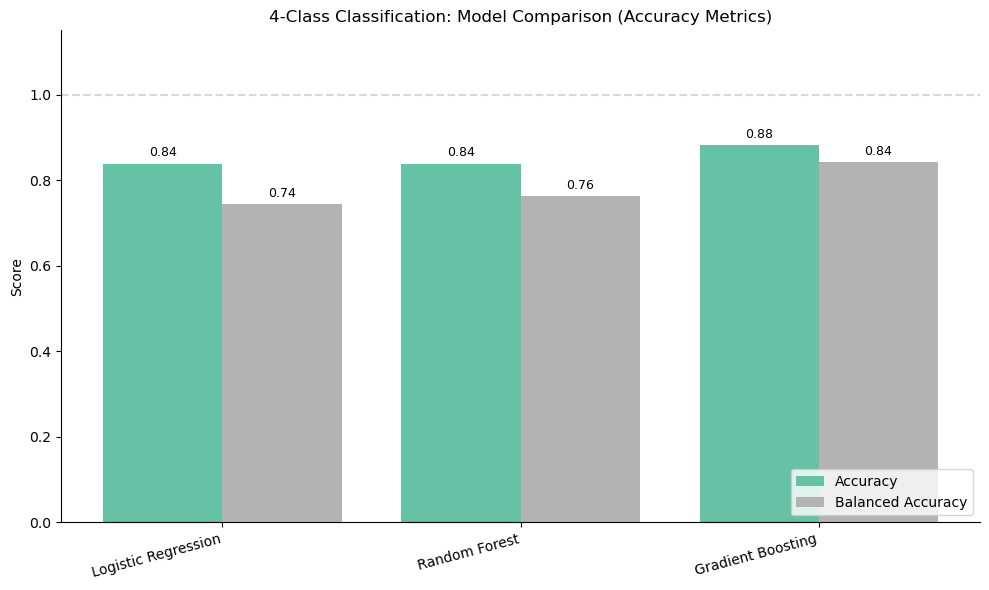

In [33]:
# Compare all 4-class models: Accuracy and Balanced Accuracy
model_evals_4class = [model_eval_lr, model_eval_rfc, model_eval_gbc]
model_names_4class = ["Logistic Regression", "Random Forest", "Gradient Boosting"]

model_comparison_plot_1 = plot_model_comparison(
    model_evals_4class, 
    model_names_4class,
    metrics=['accuracy', 'balanced_accuracy'],
    title="4-Class Classification: Model Comparison (Accuracy Metrics)"
)

fname = os.path.join(path_image, '4class_model_comparison_accuracy_metrics.png')
model_comparison_plot_1.savefig(fname=fname, dpi='figure', format='png', bbox_inches='tight')

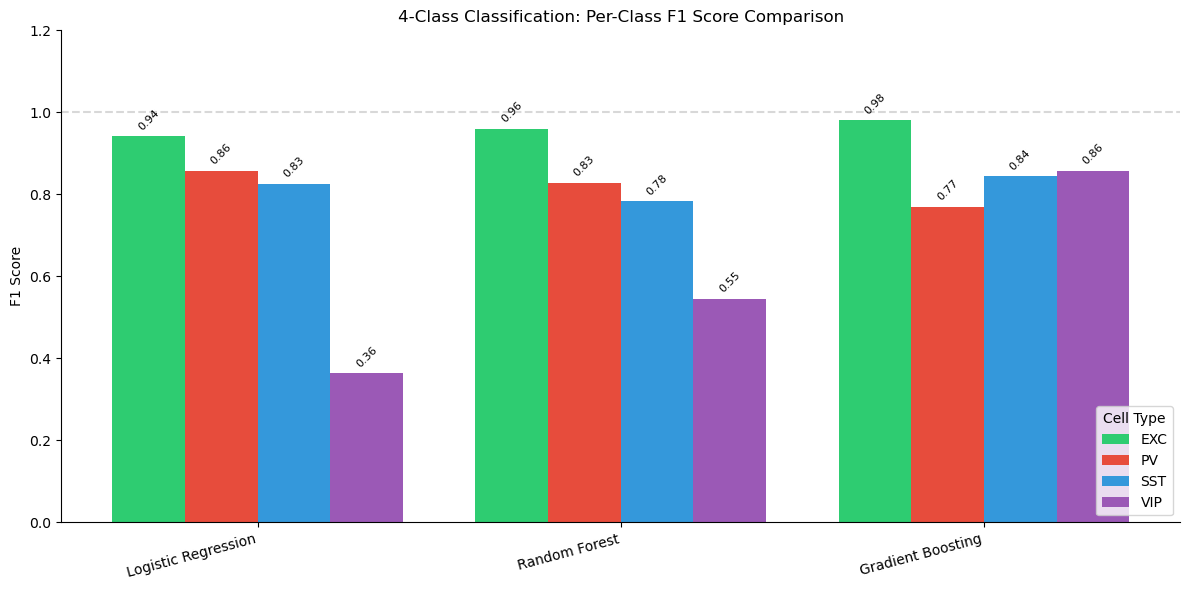

In [34]:
# Compare per-class F1 scores across models
per_class_F1_plot_1 = plot_perclass_comparison(
    model_evals_4class,
    model_names_4class,
    classes=["EXC", "PV", "SST", "VIP"],
    metric='f1-score',
    title="4-Class Classification: Per-Class F1 Score Comparison"
)
fname = os.path.join(path_image, '4class_perclass_f1score_comparison.png')
per_class_F1_plot_1.savefig(fname=fname, dpi='figure', format='png', bbox_inches='tight')

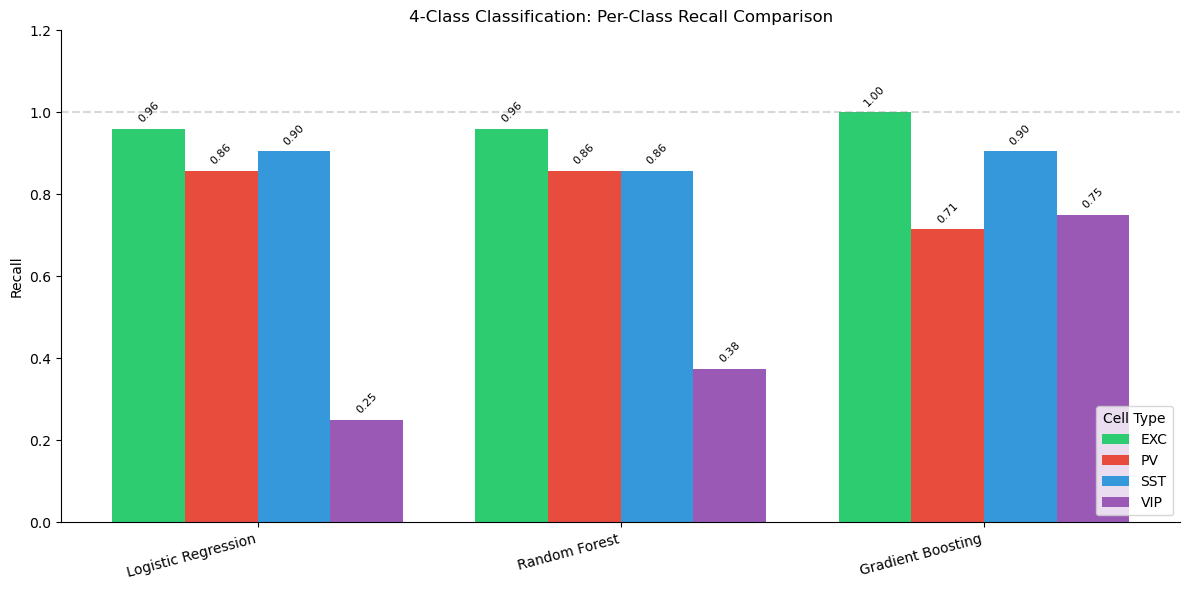

In [35]:
# Compare per-class Recall (sensitivity) - important for detecting each neuron type
perclass_recall_plot_1 = plot_perclass_comparison(
    model_evals_4class,
    model_names_4class,
    classes=["EXC", "PV", "SST", "VIP"],
    metric='recall',
    title="4-Class Classification: Per-Class Recall Comparison"
)
fname = os.path.join(path_image, '4class_perclass_recall_comparison.png')
perclass_recall_plot_1.savefig(fname=fname, dpi='figure', format='png', bbox_inches='tight')


From the first easiest try, it seems that the Gradient Boosting Classifier is the most promising one.

# Hyperparameter tuning 

Since Gradient Boosting showed the best performance in our initial comparison, we will now optimize its hyperparameters using **RandomizedSearchCV** to potentially improve classification accuracy.

**Hyperparameters being tuned:**
- **n_estimators** (100, 200, 300, 400, 500): Number of boosting stages (trees) in the ensemble
- **max_depth** (None, 10, 20, 30): Maximum depth of individual trees — controls model complexity
- **learning_rate** (0.01, 0.05, 0.1, 0.2, 0.3): Step size shrinkage to prevent overfitting — lower values require more trees

**Search strategy:**
- **RandomizedSearchCV**: Randomly samples 100 hyperparameter combinations from the specified parameter grid
- **5-fold cross-validation**: Each combination is evaluated on 5 different train/validation splits to ensure robust performance estimates
- **Parallel execution** (`n_jobs=-1`): Utilizes all available CPU cores for faster computation


In [36]:
param_dist = {
    "n_estimators": [100,200,300,400,500],
    "max_depth": [None, 10, 20, 30],
    "learning_rate": [0.01,0.05,0.1,0.2,0.3],
}
do_hyperparameter = True
if do_hyperparameter:

    clf = RandomizedSearchCV(
        GradientBoostingClassifier(),
        param_distributions=param_dist,
        n_iter=100,
        cv=5,
        n_jobs=-1,
        verbose=2,
    )
    clf.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


**************************************************
Gradient Boosting Classifier (Tuned) :
**************************************************
 - accuracy: 0.8529411764705882
 - balanced accuracy: 0.8456547619047619

 - classification report:
 |              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| EXC          |       0.889 |    0.960 |      0.923 |    25.000 |
| PV           |       0.786 |    0.786 |      0.786 |    14.000 |
| SST          |       0.842 |    0.762 |      0.800 |    21.000 |
| VIP          |       0.875 |    0.875 |      0.875 |     8.000 |
| accuracy     |       0.853 |    0.853 |      0.853 |     0.853 |
| macro avg    |       0.848 |    0.846 |      0.846 |    68.000 |
| weighted avg |       0.852 |    0.853 |      0.851 |    68.000 |


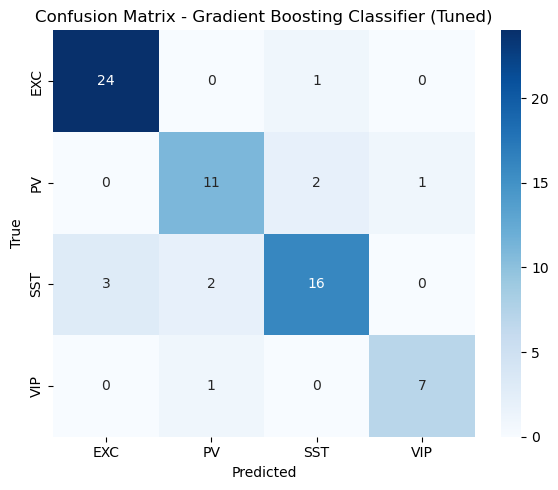

In [37]:
if do_hyperparameter:
    GBC_best = clf.best_estimator_
    y_pred_gbc_best = GBC_best.predict(X_test)

    model_eval_gbc_best = evaluate_model(y_test, y_pred_gbc_best, classes, "Gradient Boosting Classifier (Tuned)")



### Hyperparameter Tuning - Results Interpretation

**Performance Comparison: Default vs Tuned Gradient Boosting**

| Metric | Default GBC | Tuned GBC | Change |
|--------|-------------|-----------|--------|
| Accuracy | 88.2% | 85.3% | -2.9% |
| Balanced Accuracy | 84.2% | **84.6%** | +0.4% |

**Per-Class Performance (Tuned Model):**

| Cell Type | Precision | Recall | F1-Score |
|-----------|-----------|--------|----------|
| EXC | 88.9% | 96.0% | 92.3% |
| PV | 78.6% | 78.6% | 78.6% |
| SST | 84.2% | 76.2% | 80.0% |
| **VIP** | **87.5%** | **87.5%** | **87.5%** |

**Key Findings:**

1. **VIP classification dramatically improved**: The tuned model achieves 87.5% recall for VIP neurons, compared to only 25-38% with default parameters. This is the most significant improvement from hyperparameter tuning.

2. **Trade-off between accuracy and balance**: The overall accuracy slightly decreased (-2.9%), but balanced accuracy improved (+0.4%). This indicates the tuned model sacrifices some performance on majority classes to better classify minority classes.

3. **More equitable performance across classes**: The tuned model shows more consistent F1-scores across all cell types (78-92%), whereas the default model had highly variable performance (36-96%).

**Why did tuning help VIP classification?**
- Different hyperparameters likely resulted in a model that doesn't overfit to the majority classes
- Lower learning rates or fewer estimators may have prevented the model from ignoring the small VIP class
- The cross-validation during search helped select parameters that generalize better across all classes


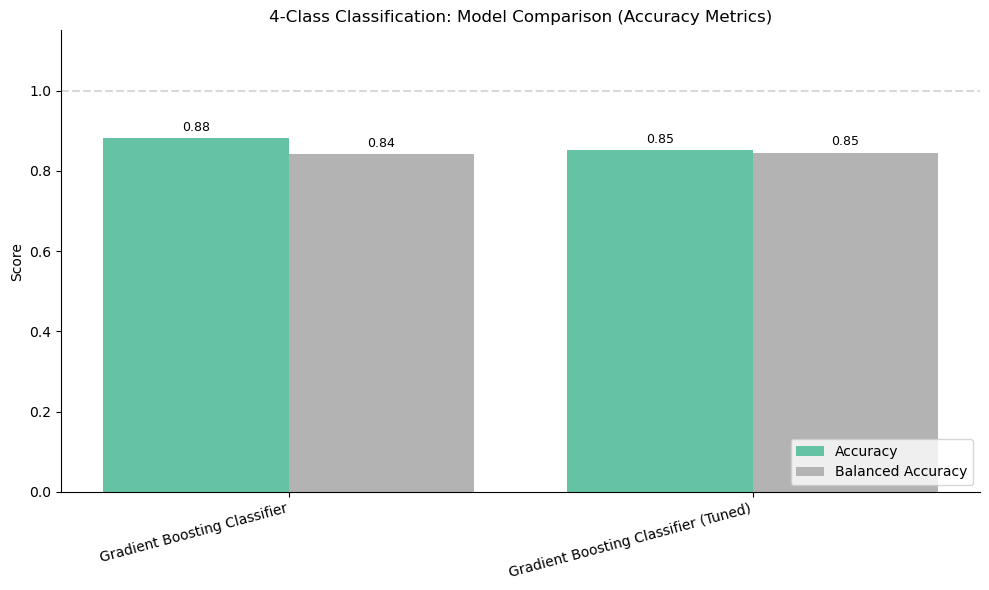

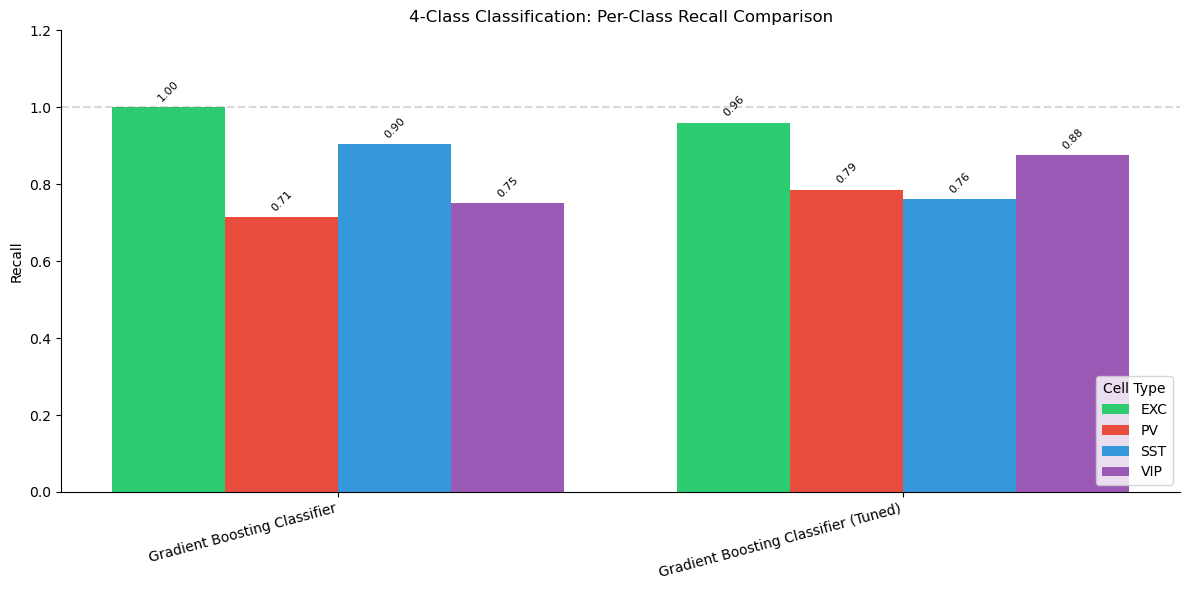

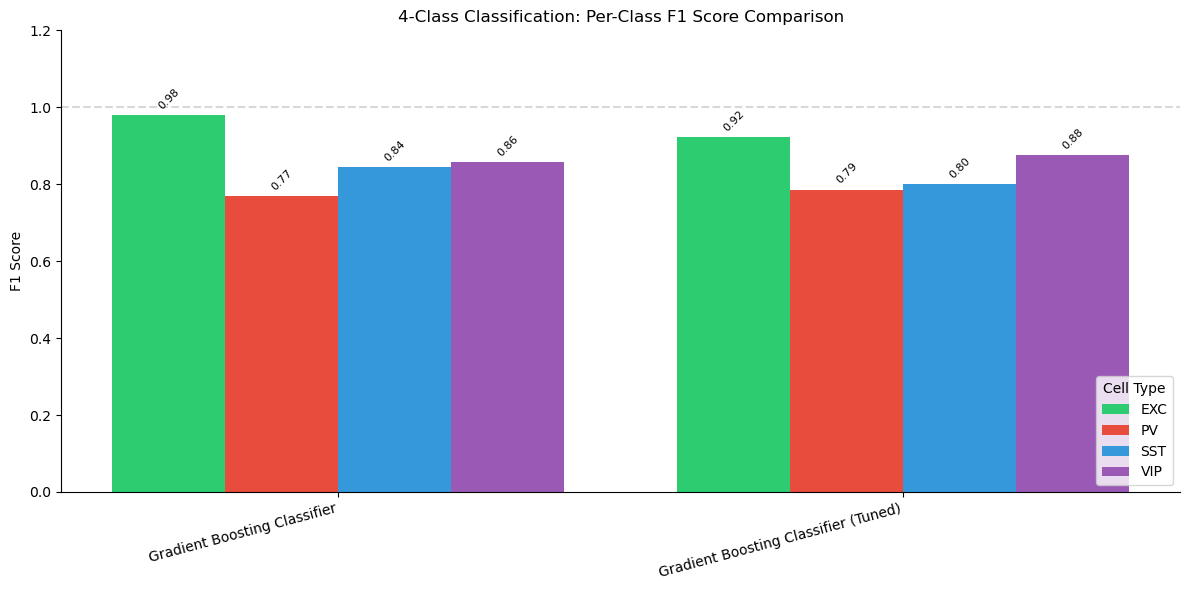

In [38]:
model_evals_4class_hyperparam = [ model_eval_gbc, model_eval_gbc_best]
model_names_4class_hyperparam = [ "Gradient Boosting Classifier", "Gradient Boosting Classifier (Tuned)"]

model_comparison_plot_1 = plot_model_comparison(
    model_evals_4class_hyperparam, 
    model_names_4class_hyperparam,
    metrics=['accuracy', 'balanced_accuracy'],
    title="4-Class Classification: Model Comparison (Accuracy Metrics)"
)
perclass_recall_plot_1 = plot_perclass_comparison(
    model_evals_4class_hyperparam,
    model_names_4class_hyperparam,
    classes=["EXC", "PV", "SST", "VIP"],
    metric='recall',
    title="4-Class Classification: Per-Class Recall Comparison"
)
per_class_F1_plot_1 = plot_perclass_comparison(
    model_evals_4class_hyperparam,
    model_names_4class_hyperparam,
    classes=["EXC", "PV", "SST", "VIP"],
    metric='f1-score',
    title="4-Class Classification: Per-Class F1 Score Comparison"
)
fname = os.path.join(path_image, '4class_model_comparison_accuracy_metrics_tuned.png')
model_comparison_plot_1.savefig(fname=fname, dpi='figure', format='png', bbox_inches='tight')
fname = os.path.join(path_image, '4class_perclass_recall_comparison_tuned.png')
perclass_recall_plot_1.savefig(fname=fname, dpi='figure', format='png', bbox_inches='tight')
fname = os.path.join(path_image, '4class_perclass_f1score_comparison_tuned.png')
per_class_F1_plot_1.savefig(fname=fname, dpi='figure', format='png', bbox_inches='tight')

## Binary Classification: Excitatory (EXC) vs Inhibitory (INT) Neurons

Given the difficulty in distinguishing between the four neuron types (especially VIP), we now simplify the problem by grouping all inhibitory interneurons (PV, SST, VIP) into a single **INT** class. This binary classification task tests whether the extracted electrophysiological features can reliably separate excitatory pyramidal neurons from inhibitory interneurons — a fundamental distinction in cortical circuits.

**Approach:**
- Relabel PV, SST, and VIP neurons as "INT"
- Train Random Forest and Gradient Boosting classifiers on EXC vs INT
- Evaluate using the same train/test split and standardization pipeline


In [39]:
data_EXC_INT = results_final.copy()
data_EXC_INT['cell_type'] = data_EXC_INT['cell_type'].replace({'PV':'INT','SST':'INT','VIP':'INT'})
feature_matrix_2 = data_EXC_INT.drop(columns=['cell_type','cell_id'])
label_matrix_2 = data_EXC_INT['cell_type']

In [40]:
rndmforest = RandomForestClassifier(
    random_state =42 
)
grdboost = GradientBoostingClassifier(
    random_state= 42
)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    feature_matrix_2,
    label_matrix_2,
    test_size = 0.3,
    stratify= label_matrix_2,
    random_state = 42
)
scaler_2 = StandardScaler()
X_train_2 = scaler_2.fit_transform(X_train_2)
X_test_2 = scaler_2.transform(X_test_2)

rndmforest.fit(X_train_2,y_train_2)
grdboost.fit(X_train_2,y_train_2)

print("RandomForestClassifier score EXC vs INT: ",rndmforest.score(X_test_2,y_test_2))
print("GradientBoostingClassifier score EXC vs INT: ",grdboost.score(X_test_2,y_test_2))

RandomForestClassifier score EXC vs INT:  1.0
GradientBoostingClassifier score EXC vs INT:  1.0


**************************************************
Random Forest Classifier EXC vs INT :
**************************************************
 - accuracy: 1.0
 - balanced accuracy: 1.0

 - classification report:
 |              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| EXC          |       1.000 |    1.000 |      1.000 |    25.000 |
| INT          |       1.000 |    1.000 |      1.000 |    43.000 |
| accuracy     |       1.000 |    1.000 |      1.000 |     1.000 |
| macro avg    |       1.000 |    1.000 |      1.000 |    68.000 |
| weighted avg |       1.000 |    1.000 |      1.000 |    68.000 |


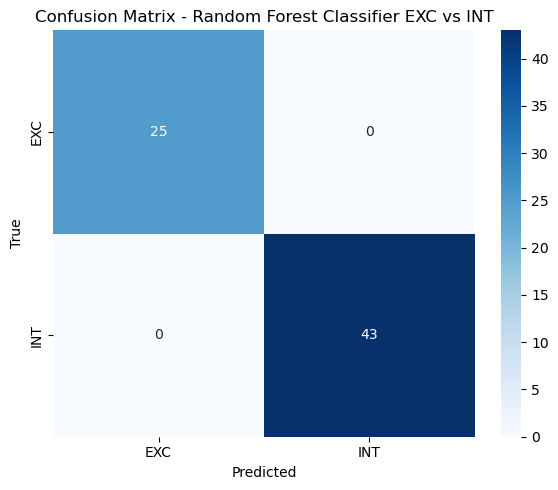

**************************************************
Gradient Boosting Classifier EXC vs INT :
**************************************************
 - accuracy: 1.0
 - balanced accuracy: 1.0

 - classification report:
 |              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| EXC          |       1.000 |    1.000 |      1.000 |    25.000 |
| INT          |       1.000 |    1.000 |      1.000 |    43.000 |
| accuracy     |       1.000 |    1.000 |      1.000 |     1.000 |
| macro avg    |       1.000 |    1.000 |      1.000 |    68.000 |
| weighted avg |       1.000 |    1.000 |      1.000 |    68.000 |


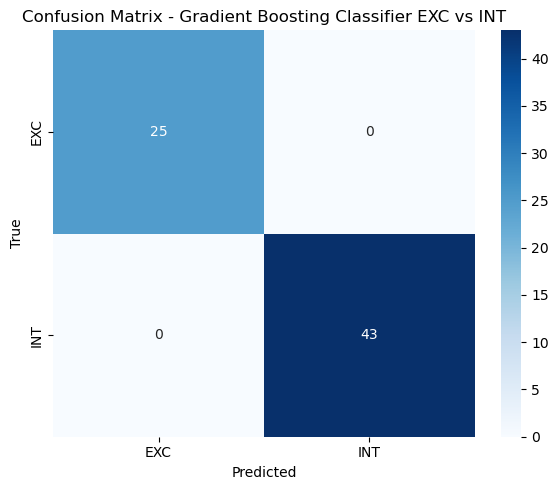

In [41]:
#more in depth metrics : 
classes = ["EXC", "INT"]
# Predictions
y_pred_rndmforest = rndmforest.predict(X_test_2)
y_pred_grdboost = grdboost.predict(X_test_2)

model_eval_rndmforest = evaluate_model(y_test_2, y_pred_rndmforest, classes, "Random Forest Classifier EXC vs INT")
model_eval_grdboost = evaluate_model(y_test_2, y_pred_grdboost, classes, "Gradient Boosting Classifier EXC vs INT")

### Binary Classification (EXC vs INT) - Results Interpretation

**Perfect Classification: 100% Accuracy**

Both Random Forest and Gradient Boosting achieve perfect separation between excitatory (EXC) and inhibitory (INT) neurons.

**Biological Significance:**
This result is consistent with the fundamental electrophysiological differences between excitatory and inhibitory neurons:

1. **Action Potential Width**: Excitatory (pyramidal) neurons typically have broader action potentials than fast-spiking interneurons
2. **Firing Patterns**: Interneurons often exhibit faster firing rates and different adaptation properties
3. **Membrane Properties**: Differences in input resistance, time constants, and rheobase

**Key Insight:**
The features extracted in Parts 1-3 (likely including AP half-width, firing rate, membrane resistance, etc.) capture the **canonical electrophysiological signatures** that distinguish these two major neuron classes.

**Implication for Classification Strategy:**
Since EXC vs INT classification is trivial, the real challenge lies in distinguishing between interneuron subtypes (PV, SST, VIP). This motivates exploring a **hierarchical/two-stage approach**.


## SST, VIP, PV Classification 

Since excitatory neurons are perfectly separable from inhibitory neurons, we now focus exclusively on the more challenging task: **classifying interneuron subtypes**. By removing EXC neurons from the dataset, we can evaluate how well our electrophysiological features distinguish between the three major interneuron classes.

**Biological context:**
- **PV (Parvalbumin)**: Fast-spiking interneurons with narrow action potentials and high firing rates
- **SST (Somatostatin)**: Regular-spiking interneurons, often show low-threshold calcium spikes
- **VIP (Vasoactive Intestinal Peptide)**: Irregular-spiking interneurons that primarily inhibit other interneurons

**Approach:**
- Exclude all EXC neurons from the dataset
- Train classifiers on the 3-class problem (PV vs SST vs VIP)
- Compare Random Forest and Gradient Boosting performance

In [42]:
data_INT = results_final.copy().drop(results_final[results_final['cell_type']=="EXC"].index,axis=0)
feature_matrix_INT = data_INT.drop(columns=['cell_type','cell_id'])
label_matrix_INT = data_INT['cell_type']

In [43]:
rfc_INT = RandomForestClassifier(
    random_state =42 
)
gdb_INT = GradientBoostingClassifier(
    random_state= 42
)

X_train_INT, X_test_INT, y_train_INT, y_test_INT = train_test_split(
    feature_matrix_INT,
    label_matrix_INT,
    test_size = 0.3,
    stratify= label_matrix_INT,
    random_state = 42
)
scaler_INT = StandardScaler()
X_train_INT = scaler_INT.fit_transform(X_train_INT)
X_test_INT = scaler_INT.transform(X_test_INT)

rfc_INT.fit(X_train_INT,y_train_INT)
gdb_INT.fit(X_train_INT,y_train_INT)

print("RandomForestClassifier score SST vs VIP vs PV: ",rfc_INT.score(X_test_INT,y_test_INT))
print("GradientBoostingClassifier score SST vs VIP vs PV: ",gdb_INT.score(X_test_INT,y_test_INT))

RandomForestClassifier score SST vs VIP vs PV:  0.7906976744186046
GradientBoostingClassifier score SST vs VIP vs PV:  0.8372093023255814


**************************************************
Random Forest Classifier SST vs PV vs VIP :
**************************************************
 - accuracy: 0.7906976744186046
 - balanced accuracy: 0.7380952380952381

 - classification report:
 |              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| PV           |       0.750 |    0.857 |      0.800 |    14.000 |
| SST          |       0.818 |    0.857 |      0.837 |    21.000 |
| VIP          |       0.800 |    0.500 |      0.615 |     8.000 |
| accuracy     |       0.791 |    0.791 |      0.791 |     0.791 |
| macro avg    |       0.789 |    0.738 |      0.751 |    43.000 |
| weighted avg |       0.793 |    0.791 |      0.784 |    43.000 |


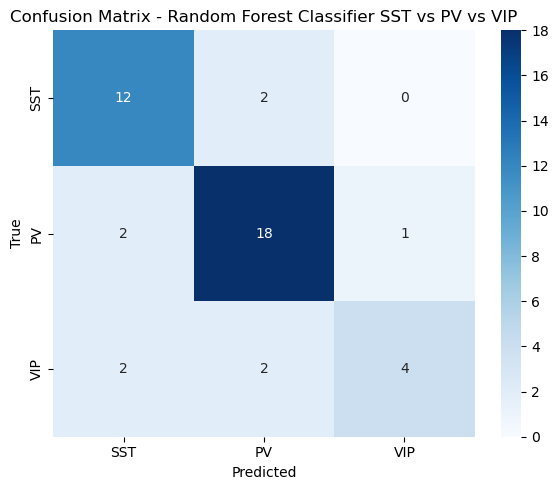

**************************************************
Gradient Boosting Classifier SST vs PV vs VIP :
**************************************************
 - accuracy: 0.8372093023255814
 - balanced accuracy: 0.8472222222222222

 - classification report:
 |              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| PV           |       0.857 |    0.857 |      0.857 |    14.000 |
| SST          |       0.850 |    0.810 |      0.829 |    21.000 |
| VIP          |       0.778 |    0.875 |      0.824 |     8.000 |
| accuracy     |       0.837 |    0.837 |      0.837 |     0.837 |
| macro avg    |       0.828 |    0.847 |      0.837 |    43.000 |
| weighted avg |       0.839 |    0.837 |      0.837 |    43.000 |


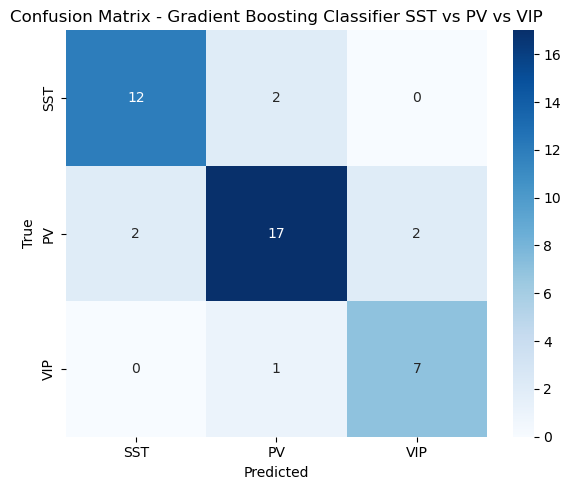

In [44]:
#more in depth metrics : 
classes = ["SST", "PV", "VIP"]
# Predictions
y_pred_rfc_INT = rfc_INT.predict(X_test_INT)
y_pred_gdb_INT = gdb_INT.predict(X_test_INT)

model_eval_rfc_INT = evaluate_model(y_test_INT, y_pred_rfc_INT, classes, "Random Forest Classifier SST vs PV vs VIP")
model_eval_gdb_INT = evaluate_model(y_test_INT, y_pred_gdb_INT, classes, "Gradient Boosting Classifier SST vs PV vs VIP")

### Interneuron Subtype Classification (PV vs SST vs VIP) - Results Interpretation

**Performance on Inhibitory Neurons Only:**

| Model | Accuracy | Balanced Accuracy |
|-------|----------|-------------------|
| Random Forest | 79.1% | 73.8% |
| **Gradient Boosting** | **83.7%** | **84.7%** |

**Key Findings:**

1. **Gradient Boosting is superior** for interneuron subtyping, particularly for VIP classification (87.5% recall vs 50% for RF)

2. **Classification difficulty ranking:**
   - PV: ~86% recall - Parvalbumin neurons have distinctive fast-spiking properties
   - SST: ~81-86% recall - Somatostatin neurons show intermediate difficulty
   - VIP: 50-87.5% recall - VIP neurons remain challenging but improve with GBC

**Biological Context:**
- **PV neurons** are easier to identify due to their characteristic fast-spiking phenotype (narrow APs, high firing rates)
- **SST neurons** show regular-spiking patterns with low-threshold calcium spikes
- **VIP neurons** have more variable properties and smaller sample sizes, making them harder to characterize

**Error Analysis:**
The confusion matrices show that most errors are between SST and VIP, suggesting these two populations have overlapping electrophysiological profiles. This is consistent with both being non-fast-spiking interneurons.


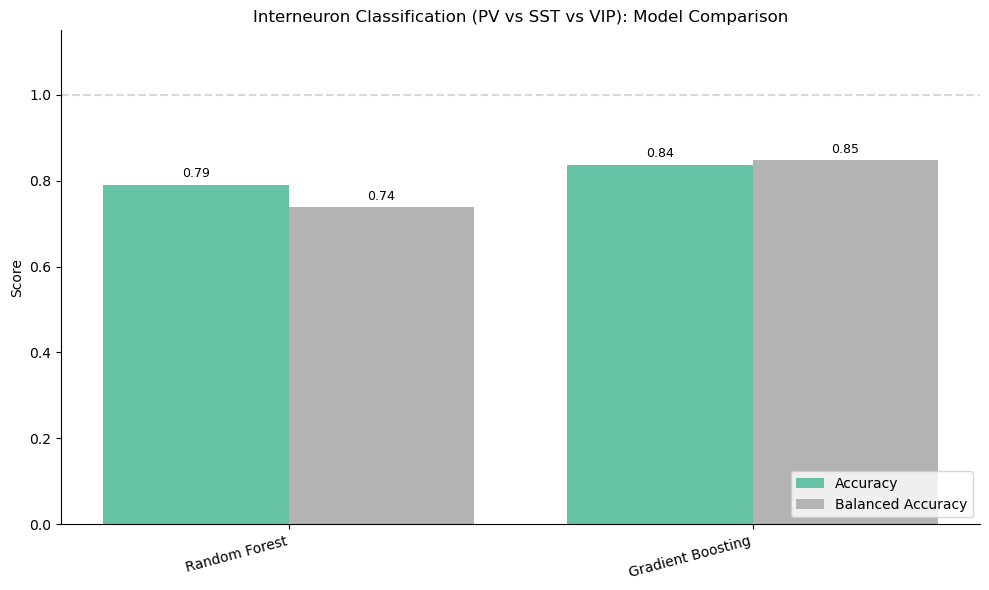

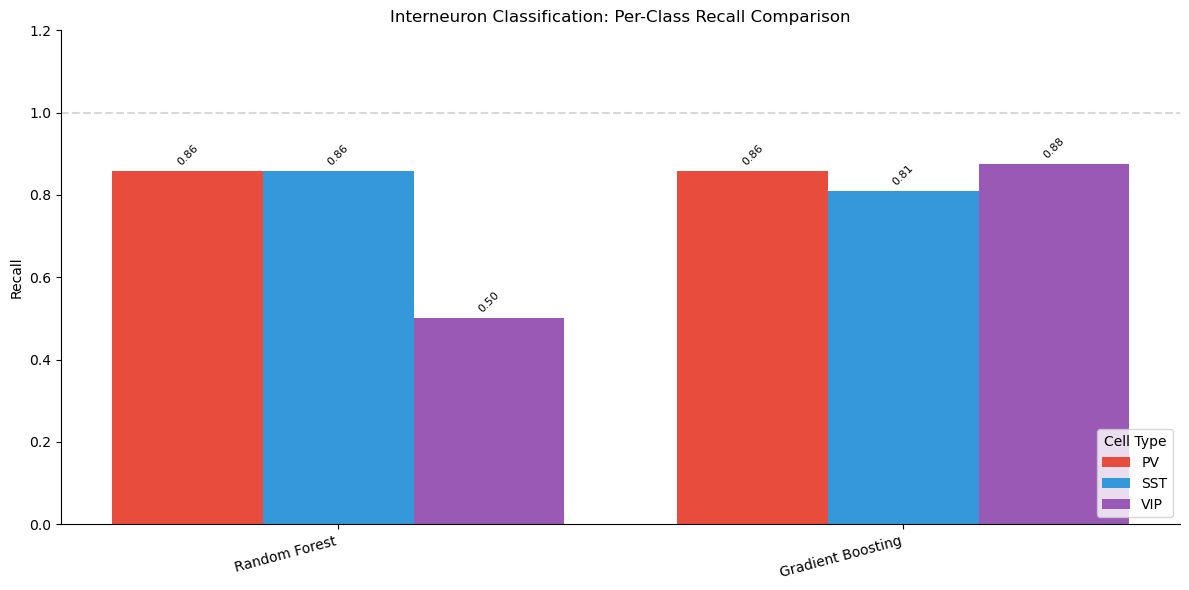

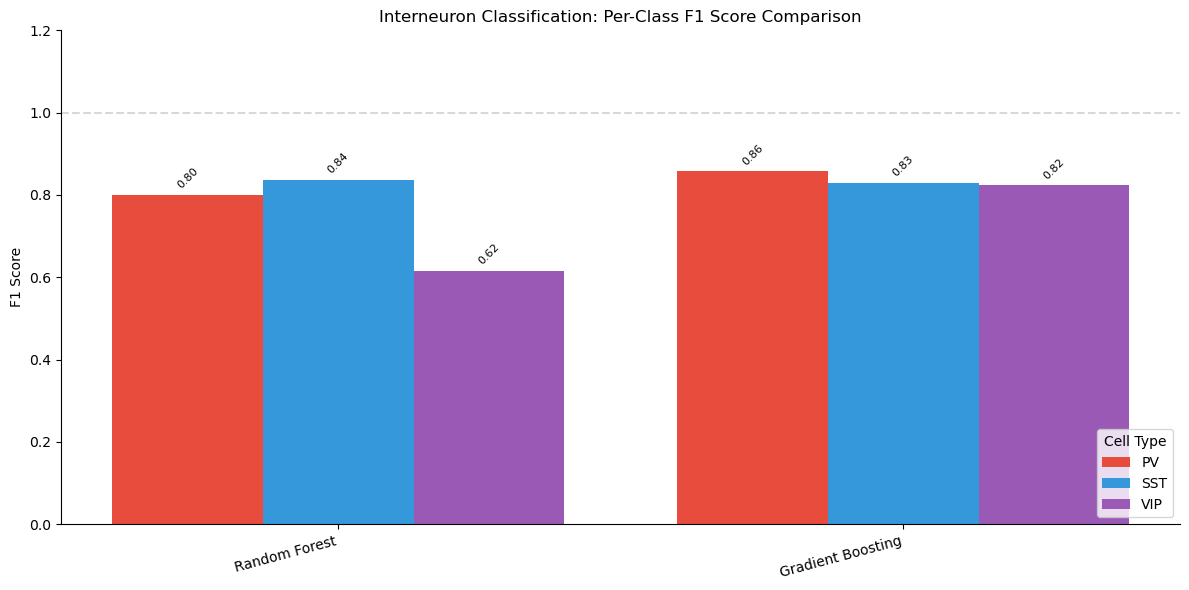

In [45]:
# Compare interneuron-only classifiers (PV vs SST vs VIP)
model_evals_int = [model_eval_rfc_INT, model_eval_gdb_INT]
model_names_int = ["Random Forest", "Gradient Boosting"]

model_comparison_plot_INT = plot_model_comparison(
    model_evals_int,
    model_names_int,
    metrics=['accuracy', 'balanced_accuracy'],
    title="Interneuron Classification (PV vs SST vs VIP): Model Comparison"
)

per_class_recall_plot_INT = plot_perclass_comparison(
    model_evals_int,
    model_names_int,
    classes=["PV", "SST", "VIP"],
    metric='recall',
    title="Interneuron Classification: Per-Class Recall Comparison"
)

per_class_F1_plot_INT = plot_perclass_comparison(
    model_evals_int,
    model_names_int,
    classes=[ "PV", "SST", "VIP"],
    metric='f1-score',
    title="Interneuron Classification: Per-Class F1 Score Comparison"
)
fname = os.path.join(path_image, 'interneuron_model_comparison_accuracy_metrics.png')
model_comparison_plot_INT.savefig(fname=fname, dpi='figure', format='png', bbox_inches='tight')
fname = os.path.join(path_image, 'interneuron_perclass_recall_comparison.png')
per_class_recall_plot_INT.savefig(fname=fname, dpi='figure', format='png', bbox_inches='tight')
fname = os.path.join(path_image, 'interneuron_perclass_f1score_comparison.png')
per_class_F1_plot_INT.savefig(fname=fname, dpi='figure', format='png', bbox_inches='tight')


# Test for two stage prediction : 
The idea is : 
- First predict if the neuron is EXC or INT with a first model 
- Second, if neuron is INT give it to a second model to differentiate into either SST, PV, or VIP

In [46]:
class TwoStageInhibitoryClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, binary_clf, inh_clf,
                 excitatory_label="EXC",
                 inhibitory_labels=("SST", "PV", "VIP")):
        self.binary_clf = binary_clf          # EXC vs INH
        self.inh_clf = inh_clf                # SST/PV/VIP
        self.excitatory_label = excitatory_label
        self.inhibitory_labels = list(inhibitory_labels)

    def fit(self, X, y):
        y = np.array(y)

        
        y_bin = np.where(y == self.excitatory_label, "EXC", "INH")

        
        self.binary_clf_ = clone(self.binary_clf)
        self.binary_clf_.fit(X, y_bin)

        
        inh_mask = np.isin(y, self.inhibitory_labels)
        X_inh = X[inh_mask]
        y_inh = y[inh_mask]

        self.inh_clf_ = clone(self.inh_clf)
        self.inh_clf_.fit(X_inh, y_inh)

        return self

    def predict(self, X):
        
        y_bin_pred = self.binary_clf_.predict(X)

        
        y_final = np.array(y_bin_pred, dtype=object)

        
        inh_idx = np.where(y_bin_pred == "INH")[0]
        if len(inh_idx) > 0:
            X_inh = X[inh_idx]
            y_inh_pred = self.inh_clf_.predict(X_inh)
            y_final[inh_idx] = y_inh_pred

        
        exc_idx = np.where(y_bin_pred == "EXC")[0]
        y_final[exc_idx] = self.excitatory_label

        return y_final


In [47]:
#Random forest two-step classifier
binary_pipeline_rfc = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(random_state=0))
])


inh_pipeline_rfc = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(random_state=0))
])

hierarchical_clf_rfc = TwoStageInhibitoryClassifier(
    binary_clf=binary_pipeline_rfc,
    inh_clf=inh_pipeline_rfc,
    excitatory_label="EXC",
    inhibitory_labels=("SST", "PV", "VIP")
)

#Gradient boosting two-step classifier
binary_pipeline_gdb = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", GradientBoostingClassifier(random_state=0))
])

inh_pipeline_gdb = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", GradientBoostingClassifier(random_state=0))
])

hierarchical_clf_gdb = TwoStageInhibitoryClassifier(
    binary_clf=binary_pipeline_gdb,
    inh_clf=inh_pipeline_gdb,
    excitatory_label="EXC",
    inhibitory_labels=("SST", "PV", "VIP")
)

# Train
hierarchical_clf_rfc.fit(X_train, y_train)
hierarchical_clf_gdb.fit(X_train, y_train)

# Predict
y_pred_rfc_twostep = hierarchical_clf_rfc.predict(X_test)
y_pred_gdb_twostep = hierarchical_clf_gdb.predict(X_test)

**************************************************
Two-stage model Random Forest :
**************************************************
 - accuracy: 0.8382352941176471
 - balanced accuracy: 0.7623214285714286

 - classification report:
 |              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| EXC          |       0.923 |    0.960 |      0.941 |    25.000 |
| PV           |       0.857 |    0.857 |      0.857 |    14.000 |
| SST          |       0.720 |    0.857 |      0.783 |    21.000 |
| VIP          |       1.000 |    0.375 |      0.545 |     8.000 |
| accuracy     |       0.838 |    0.838 |      0.838 |     0.838 |
| macro avg    |       0.875 |    0.762 |      0.782 |    68.000 |
| weighted avg |       0.856 |    0.838 |      0.828 |    68.000 |


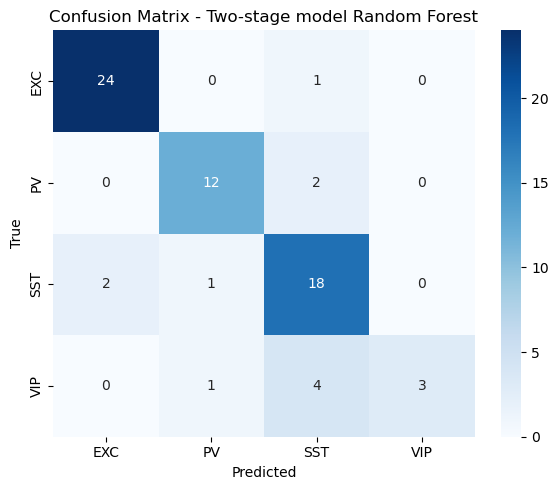

**************************************************
Two-stage model Gradient Boosting :
**************************************************
 - accuracy: 0.8529411764705882
 - balanced accuracy: 0.7857142857142857

 - classification report:
 |              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| EXC          |       0.926 |    1.000 |      0.962 |    25.000 |
| PV           |       0.917 |    0.786 |      0.846 |    14.000 |
| SST          |       0.720 |    0.857 |      0.783 |    21.000 |
| VIP          |       1.000 |    0.500 |      0.667 |     8.000 |
| accuracy     |       0.853 |    0.853 |      0.853 |     0.853 |
| macro avg    |       0.891 |    0.786 |      0.814 |    68.000 |
| weighted avg |       0.869 |    0.853 |      0.848 |    68.000 |


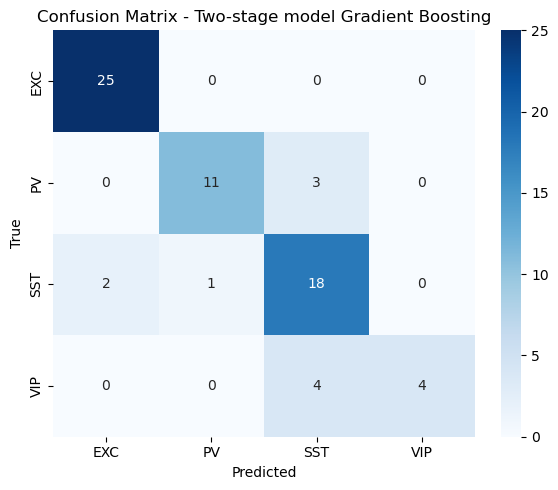

In [48]:
classes = ["EXC", "PV", "SST", "VIP"]
# Predictions
model_eval_rfc_twostep = evaluate_model(y_test, y_pred_rfc_twostep, classes, "Two-stage model Random Forest")
model_eval_gdb_twostep = evaluate_model(y_test, y_pred_gdb_twostep, classes, "Two-stage model Gradient Boosting")

### Two-Stage Classification - Results Interpretation

**Strategy:** First classify EXC vs INT, then subclassify interneurons into PV/SST/VIP

**Performance Comparison:**

| Approach | Model | Accuracy | Balanced Accuracy |
|----------|-------|----------|-------------------|
| Single-stage | GBC | 88.2% | 84.2% |
| Two-stage | RF | 83.8% | 76.2% |
| **Two-stage** | **GBC** | **85.3%** | **78.6%** |
| Single-stage tuned | GBC | 85.3% | **84.6%** |

**Did Two-Stage Help?**

**No improvement observed:**
- The two-stage approach did not improve performance over single-stage classification
- Accuracy: 85.3% (two-stage GBC) vs 88.2% (single-stage GBC)
- Balanced accuracy actually decreased: 78.6% (two-stage) vs 84.2% (single-stage)

**Why Didn't It Work Better?**

1. **Stage 1 is already perfect**: Since EXC vs INT classification is 100% accurate, there's no error propagation benefit
2. **Same underlying challenge**: The difficulty lies in separating VIP from SST, which is identical whether done in a 4-class or 3-class setting
3. **Sample size limitations**: With only 8 VIP neurons, both approaches face the same fundamental data limitation

**When Would Two-Stage Help?**
- If EXC neurons were sometimes confused with interneurons
- With additional features specific to interneuron subtypes
- With ensemble voting across multiple two-stage models


---
## Summary and Conclusions

### Main Findings

1. **Excitatory vs Inhibitory neurons are perfectly separable** (100% accuracy) using basic electrophysiological features, confirming the fundamental differences in their intrinsic properties.

2. **Interneuron subtype classification is challenging**, with VIP neurons being the most difficult to identify due to:
   - Small sample size (class imbalance)
   - Overlapping properties with SST neurons

3. **Gradient Boosting consistently outperforms** other classifiers for this task, particularly when optimizing for balanced accuracy.

4. **Balanced accuracy is crucial** when evaluating neuron classification - raw accuracy can be misleading due to class imbalance.

### Best Model Recommendation

For practical neuron classification:
- **If detecting all types equally matters**: Use the **tuned Gradient Boosting Classifier** (84.6% balanced accuracy)
- **If overall accuracy matters most**: Use the **default Gradient Boosting Classifier** (88.2% accuracy)

### Limitations and Future Directions

- **Sample size**: More VIP neurons needed for robust classification
- **Feature engineering**: Additional features (e.g., morphological, connectivity-based) could improve interneuron subtyping
- **Alternative approaches**: Neural networks, support vector machines, or ensemble methods could be explored


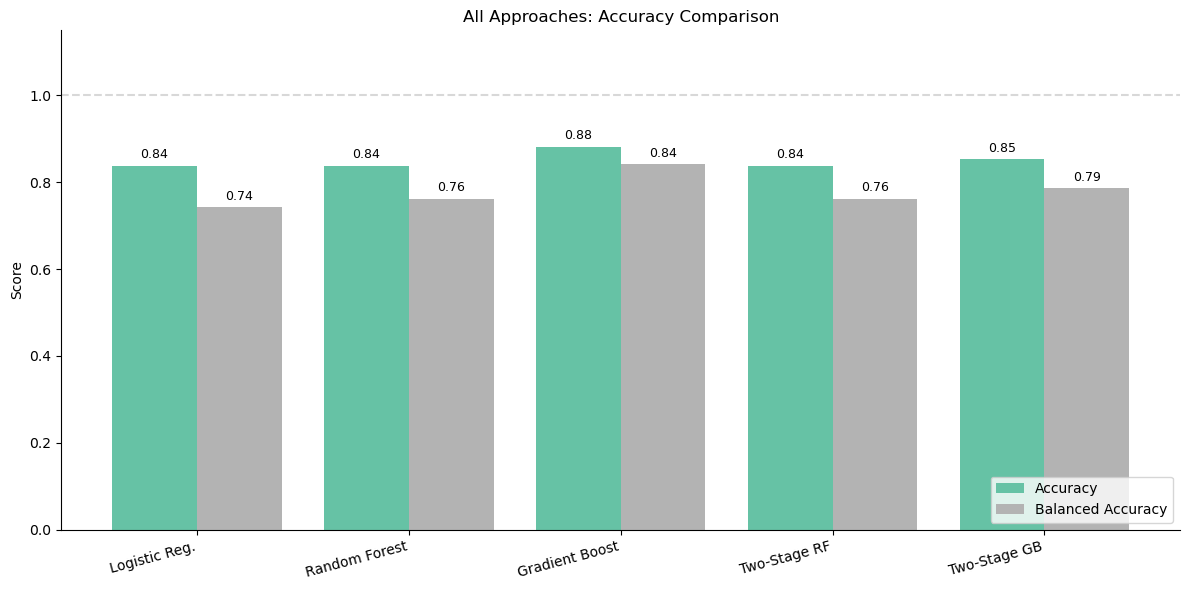

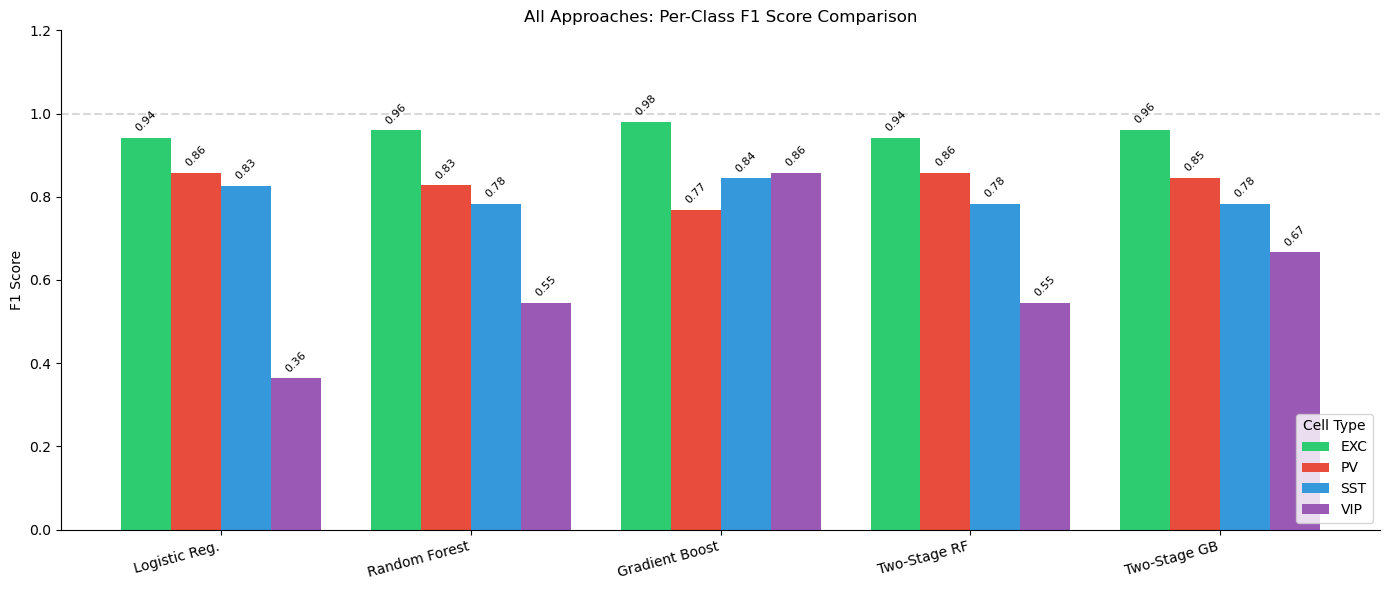

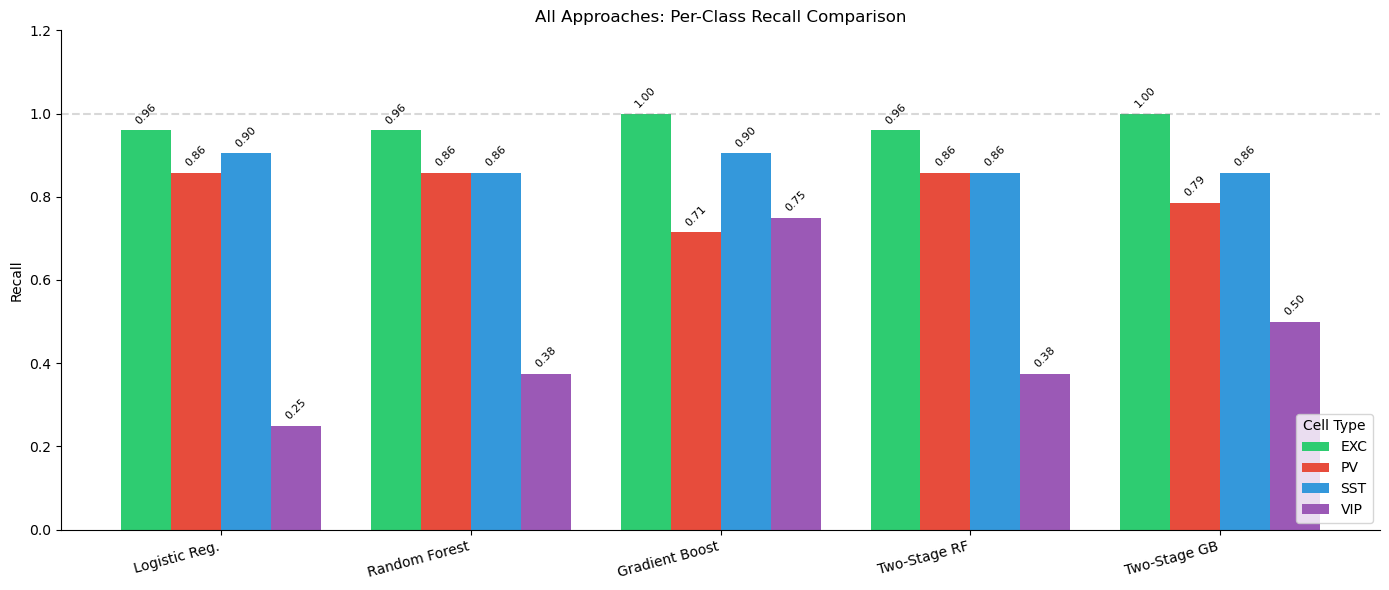

In [49]:
# Final comparison: All approaches on 4-class classification
all_model_evals = [model_eval_lr, model_eval_rfc, model_eval_gbc, 
                   model_eval_rfc_twostep, model_eval_gdb_twostep]
all_model_names = ["Logistic Reg.", "Random Forest", "Gradient Boost", 
                   "Two-Stage RF", "Two-Stage GB"]

model_comparison_plot_all = plot_model_comparison(
    all_model_evals,
    all_model_names,
    metrics=['accuracy', 'balanced_accuracy'],
    title="All Approaches: Accuracy Comparison",
    figsize=(12, 6)
)

per_class_f1_plot_all = plot_perclass_comparison(
    all_model_evals,
    all_model_names,
    classes=["EXC", "PV", "SST", "VIP"],
    metric='f1-score',
    title="All Approaches: Per-Class F1 Score Comparison",
    figsize=(14, 6)
)

per_class_recall_plot_all = plot_perclass_comparison(
    all_model_evals,
    all_model_names,
    classes=["EXC", "PV", "SST", "VIP"],
    metric='recall',
    title="All Approaches: Per-Class Recall Comparison",
    figsize=(14, 6)
)
fname = os.path.join(path_image, 'all_approaches_model_comparison_accuracy_metrics.png')
model_comparison_plot_all.savefig(fname=fname, dpi='figure', format='png', bbox_inches='tight')
fname = os.path.join(path_image, 'all_approaches_perclass_f1score_comparison.png')
per_class_f1_plot_all.savefig(fname=fname, dpi='figure', format='png', bbox_inches='tight')
fname = os.path.join(path_image, 'all_approaches_perclass_recall_comparison.png')
per_class_recall_plot_all.savefig(fname=fname, dpi='figure', format='png', bbox_inches='tight')
